#  IMPORT LIBRARY

In [1]:
# main library
import pandas as pd
import numpy as np

#visual library
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt

#sklearn library
from sklearn.preprocessing import LabelEncoder

# PRE-PROCESSING DATA

In [2]:
df_test = pd.read_csv('DS2/app_test.csv')
df_train = pd.read_csv('DS2/app_train.csv')

Read dataset

In [3]:
df_train.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,269220,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,122096,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595


In [4]:
df_train.shape

(61503, 24)

The training data has 61503 row and 24 column

In [5]:
df_test.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,102590,219092,0,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,...,-17598,-2650,-1411.0,-1131,SATURDAY,7,Business Entity Type 3,NaN,0.145475,0.651260
1,35895,141577,0,Cash loans,F,0,144000.0,485640.0,34537.5,450000.0,...,-14097,-7408,-7908.0,-4872,MONDAY,14,Kindergarten,NaN,0.682675,NaN
2,69154,180205,0,Cash loans,F,1,90000.0,247500.0,8887.5,247500.0,...,-18384,-2826,-8226.0,-1930,SATURDAY,12,Self-employed,0.814700,0.686312,0.758393
3,222185,357381,0,Cash loans,M,2,112500.0,506889.0,24781.5,418500.0,...,-12170,-926,-916.0,-4048,THURSDAY,13,Other,0.399219,0.266520,0.058826
4,147680,271229,0,Cash loans,M,0,216000.0,450000.0,21888.0,450000.0,...,-10790,-577,-4640.0,-2035,MONDAY,14,Business Entity Type 3,0.368452,0.610483,0.392774


In [6]:
df_test.shape

(14761, 24)

The testing data is considerably smaller

In [7]:
df_train['TARGET'].value_counts()

0    56534
1     4969
Name: TARGET, dtype: int64

There are 56534 transactions that are not late paying in data train

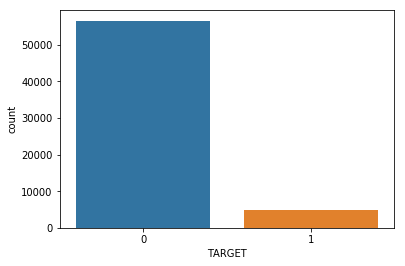

In [8]:
sns.countplot(x='TARGET',data=df_train)

The are far more loans that were repaid on time than loans that not repaid

In [9]:
df_train[(df_train['TARGET']==0)]['GENDER'].value_counts()

F    37745
M    18789
Name: GENDER, dtype: int64

In [10]:
gender_train = df_train[(df_train['TARGET']==0)]['GENDER'].count()
female_percentage_train = (37745/gender_train)* 100
male_percentage_train = (18789/gender_train)*100
print('female percentage = '+str(female_percentage_train)+'%')
print('male percentage = '+str(male_percentage_train)+'%')

female percentage = 66.7651324866452%
male percentage = 33.23486751335479%


most who are not late paying are women in data train

In [11]:
contract_type_train = df_train[(df_train['TARGET']==0)]['CONTRACT_TYPE'].value_counts()
contract_type_train

Cash loans         51049
Revolving loans     5485
Name: CONTRACT_TYPE, dtype: int64

most Contract type that not late paying are Cash loans

In [12]:
df_train['CONTRACT_TYPE'].value_counts()

Cash loans         55699
Revolving loans     5804
Name: CONTRACT_TYPE, dtype: int64

In [13]:
df_test['TARGET'].value_counts()

0    13558
1     1203
Name: TARGET, dtype: int64

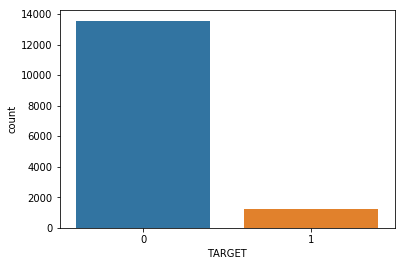

In [14]:
sns.countplot(x='TARGET',data=df_test)

The are far more loans that were repaid on time than loans that not repaid

In [15]:
df_test['GENDER'].value_counts()

F    9685
M    5076
Name: GENDER, dtype: int64

In [16]:
gender_test = df_test[(df_test['TARGET']==0)]['GENDER'].count()
female_percentage_test = (9685/gender_test)* 100
male_percentage_test= (5076/gender_test)*100
print('female percentage = '+str(female_percentage_test)+'%')
print('male percentage = '+str(male_percentage_test)+'%')

female percentage = 71.43383979938044%
male percentage = 37.43915031715592%


amost who are not late paying are women in data test

In [17]:
contract_type_test = df_test[(df_test['TARGET']==0)]['CONTRACT_TYPE'].value_counts()
contract_type_test

Cash loans         12156
Revolving loans     1402
Name: CONTRACT_TYPE, dtype: int64

most Contract type that not late paying are Cash loans

In [18]:
df_train['CONTRACT_TYPE'].value_counts()

Cash loans         55699
Revolving loans     5804
Name: CONTRACT_TYPE, dtype: int64

## Null value

In [19]:
df_train.isnull().sum()

Unnamed: 0               0
LN_ID                    0
TARGET                   0
CONTRACT_TYPE            0
GENDER                   0
NUM_CHILDREN             0
INCOME                   0
APPROVED_CREDIT          0
ANNUITY                  1
PRICE                   62
INCOME_TYPE              0
EDUCATION                0
FAMILY_STATUS            0
HOUSING_TYPE             0
DAYS_AGE                 0
DAYS_WORK                0
DAYS_REGISTRATION        0
DAYS_ID_CHANGE           0
WEEKDAYS_APPLY           0
HOUR_APPLY               0
ORGANIZATION_TYPE        0
EXT_SCORE_1          34845
EXT_SCORE_2            134
EXT_SCORE_3          12239
dtype: int64

There are 5 columns has missing value in training data

In [20]:
df_test.isnull().sum()

Unnamed: 0              0
LN_ID                   0
TARGET                  0
CONTRACT_TYPE           0
GENDER                  0
NUM_CHILDREN            0
INCOME                  0
APPROVED_CREDIT         0
ANNUITY                 0
PRICE                  20
INCOME_TYPE             0
EDUCATION               0
FAMILY_STATUS           0
HOUSING_TYPE            0
DAYS_AGE                0
DAYS_WORK               0
DAYS_REGISTRATION       0
DAYS_ID_CHANGE          0
WEEKDAYS_APPLY          0
HOUR_APPLY              0
ORGANIZATION_TYPE       0
EXT_SCORE_1          8312
EXT_SCORE_2            19
EXT_SCORE_3          2919
dtype: int64

There are 4 columns has missing value in test data

# Looking categorical feature 

In [21]:
df_train.dtypes.value_counts()

float64    8
object     8
int64      8
dtype: int64

The training data has 8 float , 8 int , and 8 object

In [22]:
df_test.dtypes.value_counts()

float64    8
object     8
int64      8
dtype: int64

The testing data has 8 float , 8 int , and 8 object

In [23]:
# Number of unique classes in each object column
df_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

CONTRACT_TYPE         2
GENDER                2
INCOME_TYPE           7
EDUCATION             5
FAMILY_STATUS         5
HOUSING_TYPE          6
WEEKDAYS_APPLY        7
ORGANIZATION_TYPE    58
dtype: int64

In [24]:
# Number of unique classes in each object column
df_test.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

CONTRACT_TYPE         2
GENDER                2
INCOME_TYPE           5
EDUCATION             5
FAMILY_STATUS         5
HOUSING_TYPE          6
WEEKDAYS_APPLY        7
ORGANIZATION_TYPE    58
dtype: int64

In [25]:
df_train['CONTRACT_TYPE'].unique() # income type in training data has 7 unique class 

array(['Revolving loans', 'Cash loans'], dtype=object)

In [26]:
df_test['INCOME_TYPE'].unique() #income type in testing data has 5 unique class

array(['Working', 'Pensioner', 'Commercial associate', 'State servant',
       'Unemployed'], dtype=object)

# Feature Engineering

In [27]:
le = LabelEncoder()
count = 0

# Iterate through the columns
for col in df_train:
    if df_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(df_train[col])
            # Transform both training and testing data
            df_train[col] = le.transform(df_train[col])
            df_test[col] = le.transform(df_test[col])
            
            # Keep track of how many columns were label encoded
            count += 1
            
print('%d columns were label encoded.' % count)

2 columns were label encoded.


Encoding label with <= 2 unique value

In [28]:
# one-hot encoding of categorical variables
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

print('Training Features shape: ', df_train.shape)
print('Testing Features shape: ', df_test.shape)

Training Features shape:  (61503, 106)
Testing Features shape:  (14761, 104)


Encoding label with >= 2 unique value

## Drop column  and fill data

In [29]:
# Train Data
# drop unamed column and ln_id column   , no need for machine learning
df_train.drop(['Unnamed: 0'], axis=1,inplace=True)
df_train.drop(['LN_ID'], axis=1,inplace=True)

#fill ANNUITY missing value using mean 
df_train['ANNUITY'].fillna(value=df_train['ANNUITY'].mean(),inplace=True)
#fill PRICE missing value using mean 
df_train['PRICE'].fillna(value=df_train['PRICE'].mean(),inplace=True)
#EXT_SCORE_1 has a 34845 missing value which is > 50 % data , but we need this variable 
df_train['EXT_SCORE_1'].fillna(value=df_train['EXT_SCORE_1'].mean(),inplace=True)
#fill EXT_SCORE_2 missing value using mean 
df_train['EXT_SCORE_2'].fillna(value=df_train['EXT_SCORE_2'].mean(),inplace=True)
#fill EXT_SCORE_3 missing value using mean 
df_train['EXT_SCORE_3'].fillna(value=df_train['EXT_SCORE_3'].mean(),inplace=True)

#drop income type_businessman and income type_Student , not fit with test data
df_train.drop(['INCOME_TYPE_Businessman'], axis=1,inplace=True)
df_train.drop(['INCOME_TYPE_Student'], axis=1,inplace=True)

# Test Data

# drop unamed column and ln_id column   , no need for machine learning
df_test.drop(['Unnamed: 0'], axis=1,inplace=True)
df_test.drop(['LN_ID'], axis=1,inplace=True)\

#fill PRICE missing value using mean 
df_test['PRICE'].fillna(value=df_test['PRICE'].mean(),inplace=True)
#EXT_SCORE_1 has a 34845 missing value which is > 50 % data , but we need this variable 
df_test['EXT_SCORE_1'].fillna(value=df_test['EXT_SCORE_1'].mean(),inplace=True)
#fill EXT_SCORE_2 missing value using mean 
df_test['EXT_SCORE_2'].fillna(value=df_test['EXT_SCORE_2'].mean(),inplace=True)
#fill EXT_SCORE_3 missing value using mean 
df_test['EXT_SCORE_3'].fillna(value=df_test['EXT_SCORE_3'].mean(),inplace=True)
df_test.head()

,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,DAYS_AGE,DAYS_WORK,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,0,0,1,3,135000.0,871029.0,44604.0,765000.0,-17598,-2650,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,144000.0,485640.0,34537.5,450000.0,-14097,-7408,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,90000.0,247500.0,8887.5,247500.0,-18384,-2826,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,2,112500.0,506889.0,24781.5,418500.0,-12170,-926,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,216000.0,450000.0,21888.0,450000.0,-10790,-577,...,0,0,0,0,0,0,0,0,0,0


# Correlation value

In [30]:
# Find correlations with the target and sort
correlations = df_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(5))
print('\nMost Negative Correlations:\n', correlations.head(5))

Most Positive Correlations:
 DAYS_ID_CHANGE         0.055748
GENDER                 0.059428
INCOME_TYPE_Working    0.061628
DAYS_AGE               0.083524
TARGET                 1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SCORE_3                  -0.160158
EXT_SCORE_2                  -0.159255
EXT_SCORE_1                  -0.111291
EDUCATION_Higher education   -0.061117
INCOME_TYPE_Pensioner        -0.051060
Name: TARGET, dtype: float64


# Machine Learning

Split X_train and y_train

In [31]:
#Creating the X and y variables
X_train = df_train.drop('TARGET', 1).values
y_train = df_train["TARGET"].values

X_test = df_test.drop('TARGET', 1).values
y_test = df_test["TARGET"].values


In [32]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RFL = RF.fit(X_train, y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(RF.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(RF.score(X_test, y_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of Random Forest classifier on training set: 0.98
Accuracy of Random Forest classifier on test set: 0.92


In [33]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.85


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.91


The Random Forest model was the most accurate model that we tried

# Random Forest

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = RF.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[13543    15]
 [ 1191    12]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13558
           1       0.44      0.01      0.02      1203

   micro avg       0.92      0.92      0.92     14761
   macro avg       0.68      0.50      0.49     14761
weighted avg       0.88      0.92      0.88     14761



Most Appropriate model to measure = f1-score

We don’t really want to carry both Precision and Recall in our pockets every time we make a model for solving a classification problem. So it’s best if we can get a single score that kind of represents both Precision(P) and Recall(R) which is f1-score.

# Important features

In [36]:
features = list(df_train.columns)
x = sorted(zip(map(lambda x: round(x, 4), RF.feature_importances_), features), 
             reverse=True)
x.sort(reverse=True)
featureimportances = pd.DataFrame(x) 
featureimportances.head()

,0,1
0,0.0916,EXT_SCORE_1
1,0.0795,EXT_SCORE_2
2,0.0686,DAYS_REGISTRATION
3,0.0682,PRICE
4,0.0676,DAYS_WORK


Important feature EXT_SCORE 1, EXT_SCORE 2, PRICE